In [185]:
import pandas as pd
import os, json
from ast import literal_eval
import seaborn as sns
sns.set_context(font_scale=1.1)
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# Processing text files into one Json File for Wise and PayPal.

In [186]:
all_details = []
for wise_file in os.listdir("./data/Wise"):
    data = [literal_eval(i.strip()) for i in open(f'./data/Wise/{wise_file}').readlines()]
    all_details.extend(data)

In [187]:
df = pd.DataFrame(all_details)
df.head(3)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime
0,Wise,60b8b3f2f9f4870b70161798,5,Fast and transparent money transfer!,"Here is the fast, affordable, and transparent ...",2021-06-03,10:50:26,None,None,None
1,Wise,60b8b1fbf9f4870b70161539,5,Everything you can ask from a money transfer s...,Everything you can ask from a money transfer s...,2021-06-03,10:42:03,None,None,None
2,Wise,60b8b172f9f4870a94b4ca3a,5,Very quick and reliable transactions,I use wise frequently and very happy with the ...,2021-06-03,10:39:46,None,None,None


In [209]:
df["review_datetime"] = df["review_date"] +"T"+ df["review_time"]
df["review_datetime"]  = pd.to_datetime(df["review_datetime"])
df["company_reply_datetime"] = df["CompanyReplyDate"] + "T" + df["CompanyReplyTime"]
df["company_reply_datetime"] = pd.to_datetime(df["company_reply_datetime"])

df["time_taken_to_reply"] = ((df["company_reply_datetime"] - df["review_datetime"]).dt.total_seconds() / (60 * 60 * 24)).round()
# Replace NaN values with a placeholder (e.g., -1)
df["time_taken_to_reply"] = df["time_taken_to_reply"].fillna(-999).astype(int)
df = df[df["review_datetime"]>="2022-04-01"]

# Find the maximum date in the DataFrame
max_date = df['review_datetime'].max()

# Calculate the date 1 year ago from the maximum date
one_year_ago = max_date - timedelta(days=365)


df['Month-Year'] = df['review_datetime'].dt.to_period('m')
df['Month-Year'] = df['Month-Year'].dt.to_timestamp()

df.head(2)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime,time_taken_to_reply,Month-Year
20,Wise,6280b7c6f03a9893e98def64,4,"Usually very efficient,",Useful,2022-05-15,10:20:22,None,None,None,2022-05-15 10:20:22,NaT,-999,2022-05-01
21,Wise,6280ad07166eb7ecbf474180,5,Wise is simple to use,"Wise is simple to use, v fast & gets it right ...",2022-05-15,09:34:31,None,None,None,2022-05-15 09:34:31,NaT,-999,2022-05-01


## Reviews over Time

In [189]:
df

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime,time_taken_to_reply,Month-Year
20,Wise,6280b7c6f03a9893e98def64,4,"Usually very efficient,",Useful,2022-05-15,10:20:22,None,None,None,2022-05-15 10:20:22,NaT,-999,2022-05-01
21,Wise,6280ad07166eb7ecbf474180,5,Wise is simple to use,"Wise is simple to use, v fast & gets it right ...",2022-05-15,09:34:31,None,None,None,2022-05-15 09:34:31,NaT,-999,2022-05-01
22,Wise,6280aa94f03a9893e98de711,5,Excellent service,"Excellent service, quick to transfer money at ...",2022-05-15,09:24:04,None,None,None,2022-05-15 09:24:04,NaT,-999,2022-05-01
23,Wise,6280a449166eb7ecbf473cbc,5,Excellent,"Excellent, fast efficient services - highly re...",2022-05-15,08:57:13,None,None,None,2022-05-15 08:57:13,NaT,-999,2022-05-01
24,Wise,6280a35e166eb7ecbf473c57,5,Swift transfer within seconds and was…,Swift transfer within seconds and was able to ...,2022-05-15,08:53:18,None,None,None,2022-05-15 08:53:18,NaT,-999,2022-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79803,Wise,64b07a69c42344628687bb58,5,Cheap and easy,Always easy with multiple transfer options and...,2023-07-14,00:27:53,None,None,None,2023-07-14 00:27:53,NaT,-999,2023-07-01
79804,Wise,64b07a47c42344628687bb4a,1,I made many transactions and suddenly…,I made many transactions and suddenly you aske...,2023-07-14,00:27:19,"Reply from Wise\nJul 19, 2023\nHi Mohamed,\n\n...",2023-07-19,12:19:38,2023-07-14 00:27:19,2023-07-19 12:19:38,5,2023-07-01
79805,Wise,64b06b6b706f837cb10f85d6,4,Takes a while to understand the steps,Straight forward once you get the hang of it. ...,2023-07-13,23:23:55,"Reply from Wise\nJul 27, 2023\nHey,\n\nWe appr...",2023-07-27,14:28:01,2023-07-13 23:23:55,2023-07-27 14:28:01,14,2023-07-01
79806,Wise,64b06a3d706f837cb10f8540,5,It is safe and fast,"It is safe and fast, lower cost",2023-07-13,23:18:53,None,None,None,2023-07-13 23:18:53,NaT,-999,2023-07-01


<Axes: xlabel='Month-Year', ylabel='Count'>

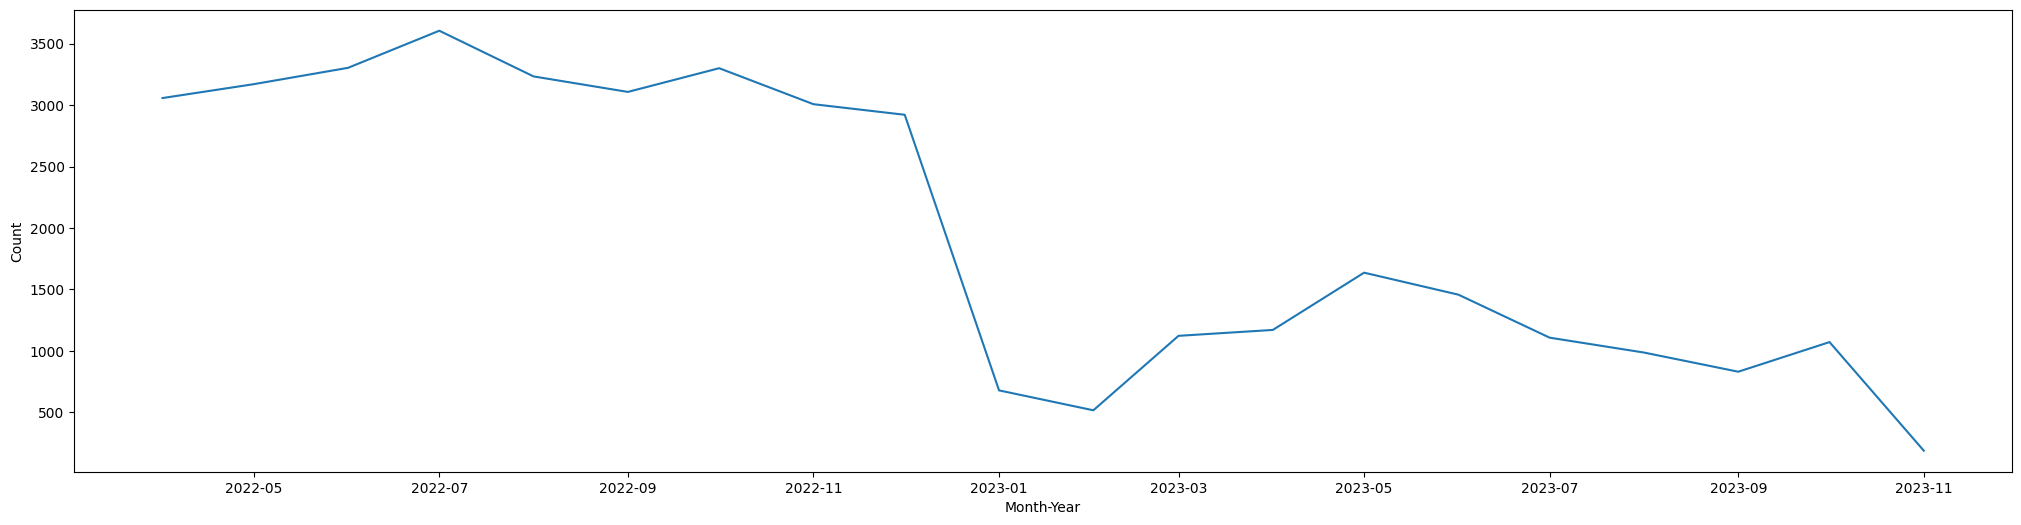

In [190]:
# df['Month-Year'] = df['review_datetime'].dt.strftime('%y-%m')
reviews_over_time = df.groupby('Month-Year').size().reset_index(name='Count')
plt.figure(figsize=(25, 6))
sns.lineplot(data= reviews_over_time, x="Month-Year", y="Count")

## Ratings Across Time

In [191]:
ratings_over_time = df.groupby('Month-Year').agg({'stars': 'mean'}).reset_index()
ratings_over_time['stars'] = ratings_over_time['stars'].round(1)

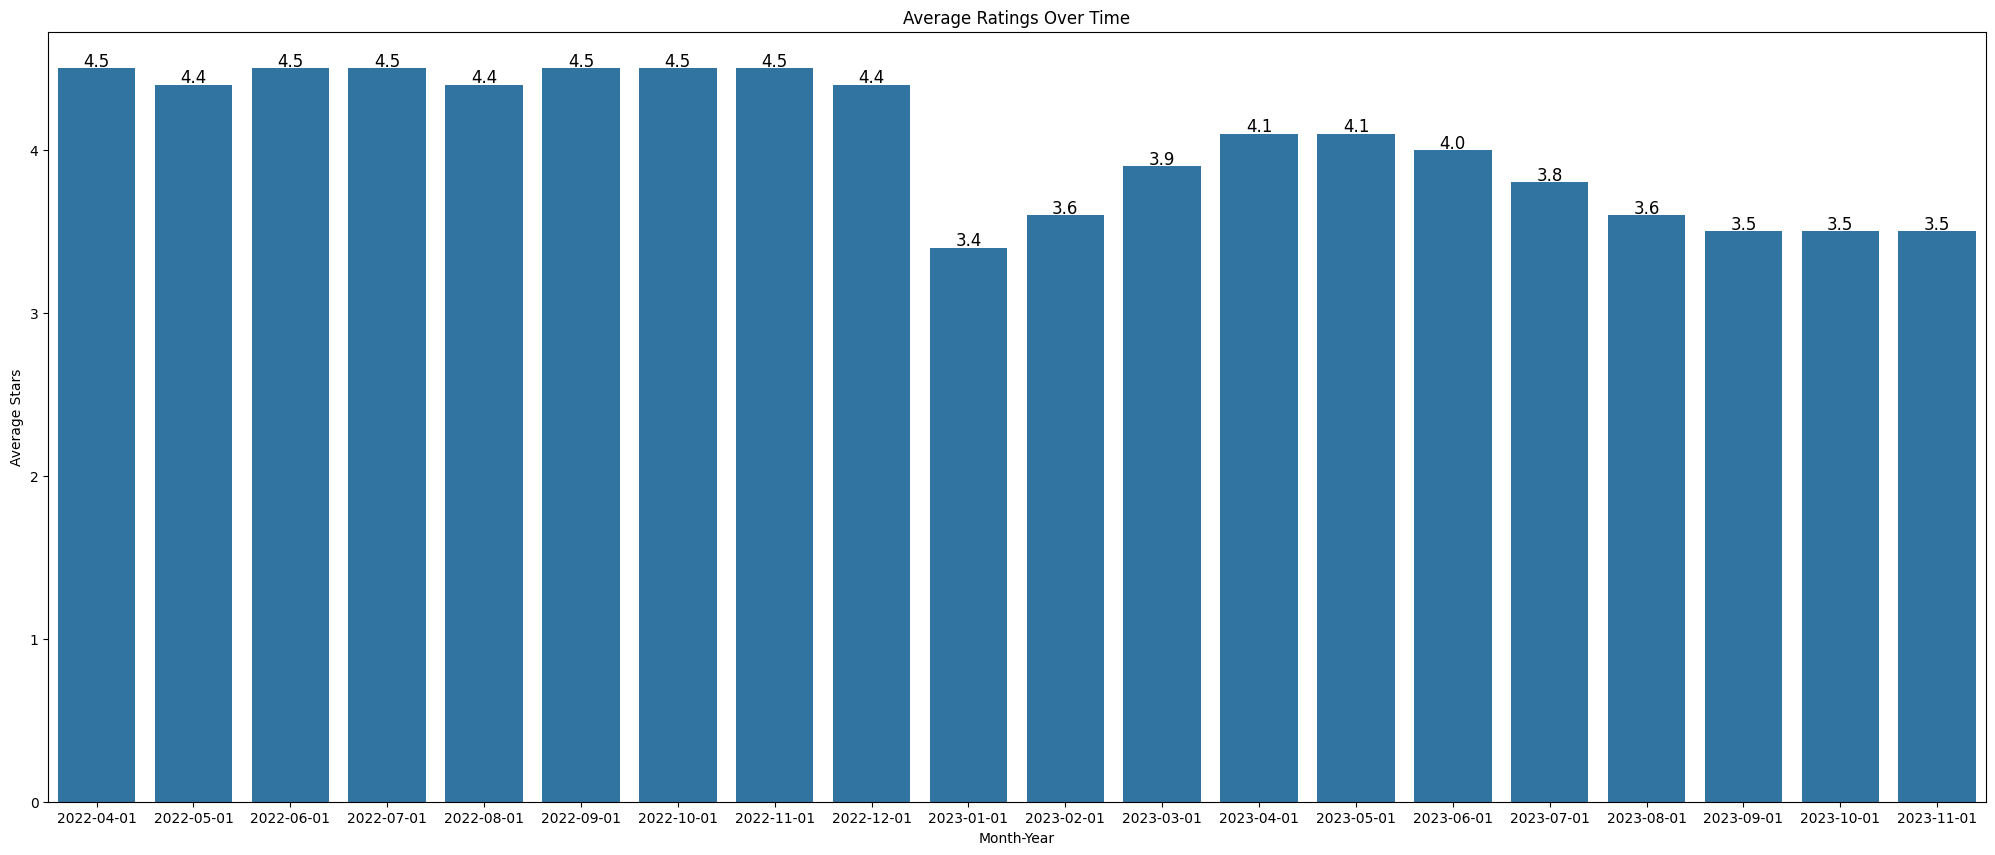

In [192]:
plt.figure(figsize=(25, 10))
# sns.barplot(data= ratings_over_time, x="Month-Year", y="stars")

ax = sns.barplot(data=ratings_over_time, x="Month-Year", y="stars")

# Add labels within the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels
plt.title('Average Ratings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Stars')

plt.show()


In [193]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')

<Axes: xlabel='Month-Year', ylabel='Count'>

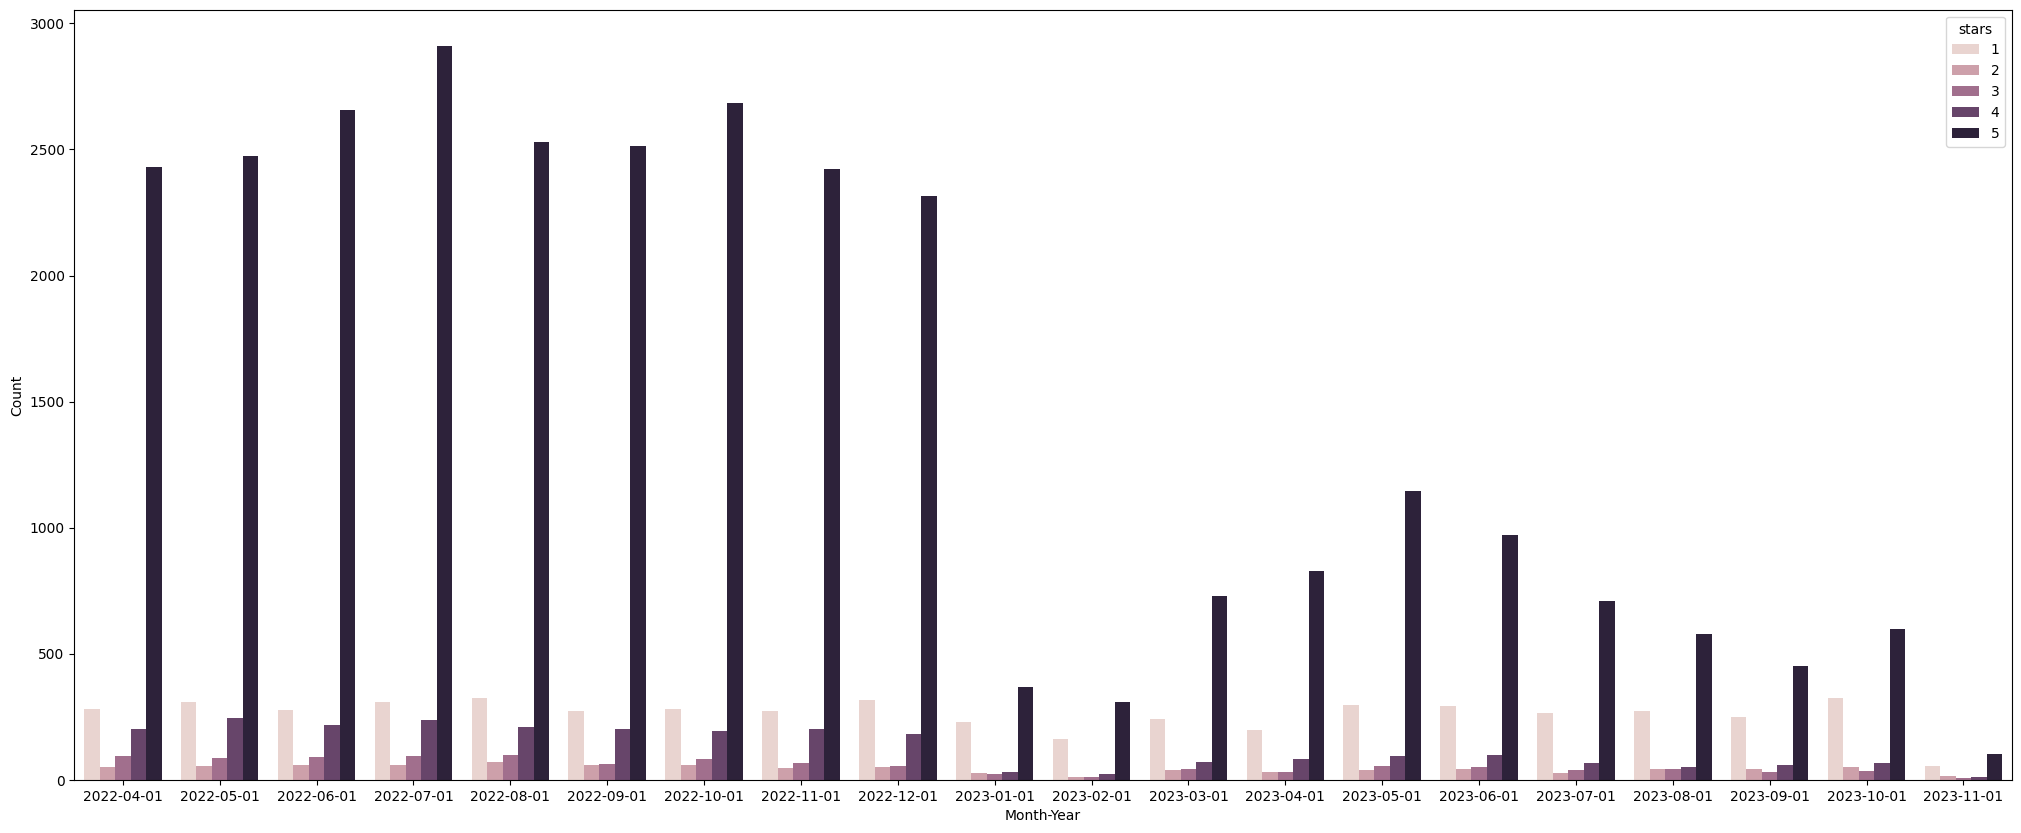

In [194]:
plt.figure(figsize=(25, 10))
sns.barplot(data=ratings_overtime_2, x="Month-Year", y="Count", hue="stars")

In [195]:
ratings_overtime_2 = df.groupby(['Month-Year', 'stars']).size().reset_index(name='Count')


# Pivot the table to make it easier to calculate percentages
pivoted = ratings_overtime_2.pivot(index='Month-Year', columns='stars', values='Count')

# Calculate the percentages
pivoted['1-Star %'] = ((pivoted[1] / pivoted.sum(axis=1)) * 100).round(1)
pivoted['5-Star %'] = ((pivoted[5] / pivoted.sum(axis=1)) * 100).round(1)
pivoted["Cumulative 1 and 5"] = pivoted['1-Star %'] + pivoted['5-Star %']

# Reset the index
pivoted.reset_index(inplace=True)

In [196]:
pivoted

stars,Month-Year,1,2,3,4,5,1-Star %,5-Star %,Cumulative 1 and 5
0,2022-04-01,282,49,94,202,2430,9.2,79.3,88.5
1,2022-05-01,308,56,87,244,2475,9.7,77.8,87.5
2,2022-06-01,276,60,92,218,2657,8.4,80.2,88.6
3,2022-07-01,308,57,93,238,2909,8.5,80.5,89.0
4,2022-08-01,325,72,99,208,2529,10.1,78.0,88.1
5,2022-09-01,273,57,63,200,2514,8.8,80.7,89.5
6,2022-10-01,280,59,83,193,2685,8.5,81.2,89.7
7,2022-11-01,271,47,65,202,2422,9.0,80.3,89.3
8,2022-12-01,318,52,56,180,2315,10.9,79.0,89.9
9,2023-01-01,230,26,22,31,369,33.9,51.8,85.7


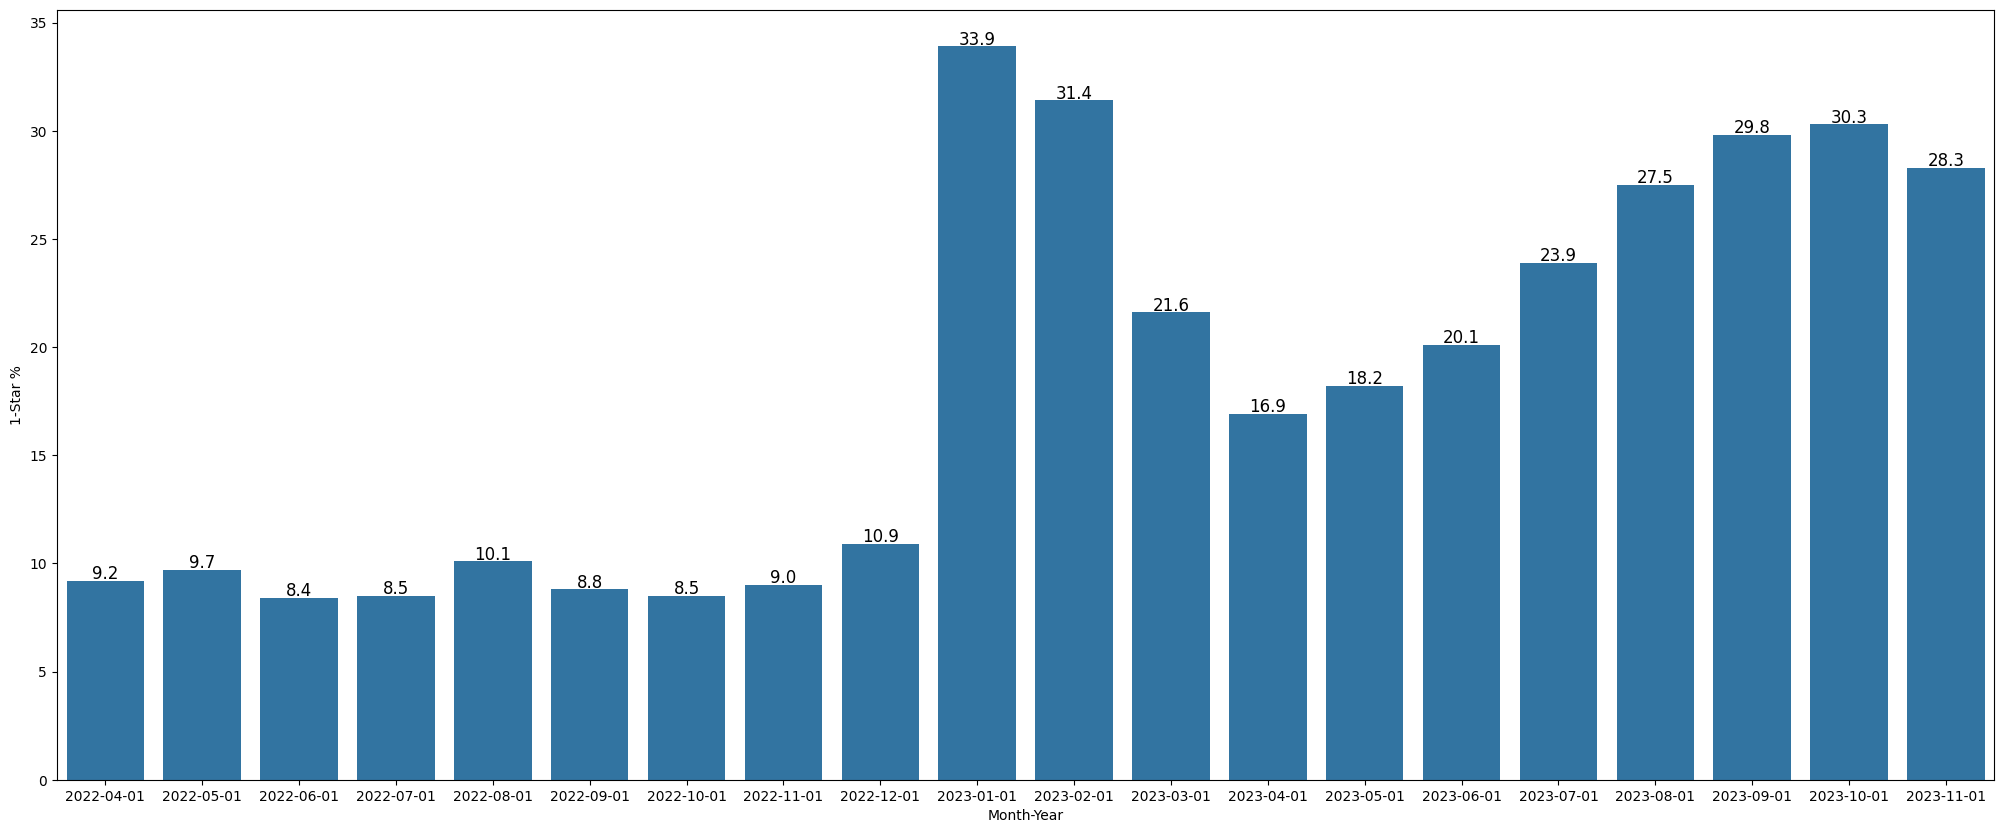

In [197]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=pivoted, x="Month-Year", y="1-Star %")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [198]:
reply_rate = df.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate)

   Month-Year  Reply Rate
0  2022-04-01    4.088976
1  2022-05-01    1.798107
2  2022-06-01    4.995459
3  2022-07-01    5.076283
4  2022-08-01    3.835447
5  2022-09-01    7.434825
6  2022-10-01    6.909091
7  2022-11-01    6.883937
8  2022-12-01    5.306402
9  2023-01-01   21.681416
10 2023-02-01   25.387597
11 2023-03-01    6.773619
12 2023-04-01   11.880342
13 2023-05-01   17.298289
14 2023-06-01   20.041181
15 2023-07-01   28.184282
16 2023-08-01   38.945233
17 2023-09-01   24.819277
18 2023-10-01   22.502334
19 2023-11-01    8.556150


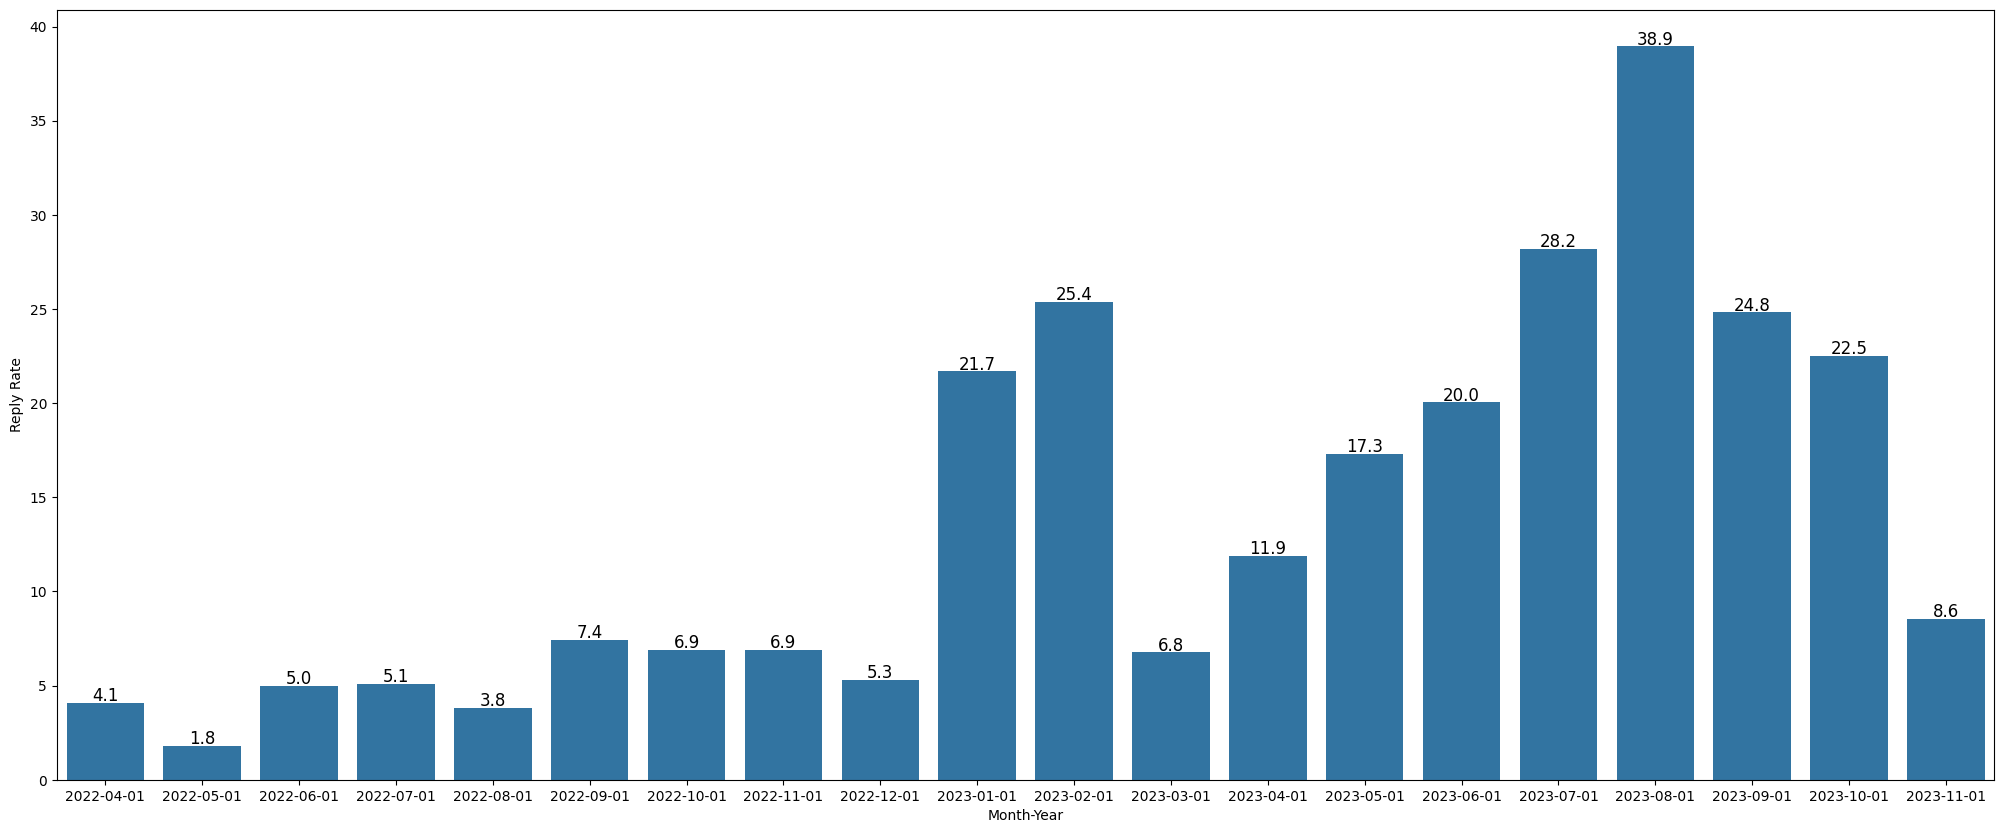

In [199]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [200]:
df_low_ratings = df[df["stars"]<3]
reply_rate_for_low_ratings = df_low_ratings.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate_for_low_ratings)

   Month-Year  Reply Rate
0  2022-04-01   28.096677
1  2022-05-01   12.087912
2  2022-06-01   38.988095
3  2022-07-01   41.643836
4  2022-08-01   20.403023
5  2022-09-01   56.666667
6  2022-10-01   53.097345
7  2022-11-01   53.773585
8  2022-12-01   35.675676
9  2023-01-01   51.953125
10 2023-02-01   69.767442
11 2023-03-01   19.642857
12 2023-04-01   35.652174
13 2023-05-01   59.763314
14 2023-06-01   51.343284
15 2023-07-01   74.402730
16 2023-08-01   93.312102
17 2023-09-01   48.442907
18 2023-10-01   37.967914
19 2023-11-01   13.636364


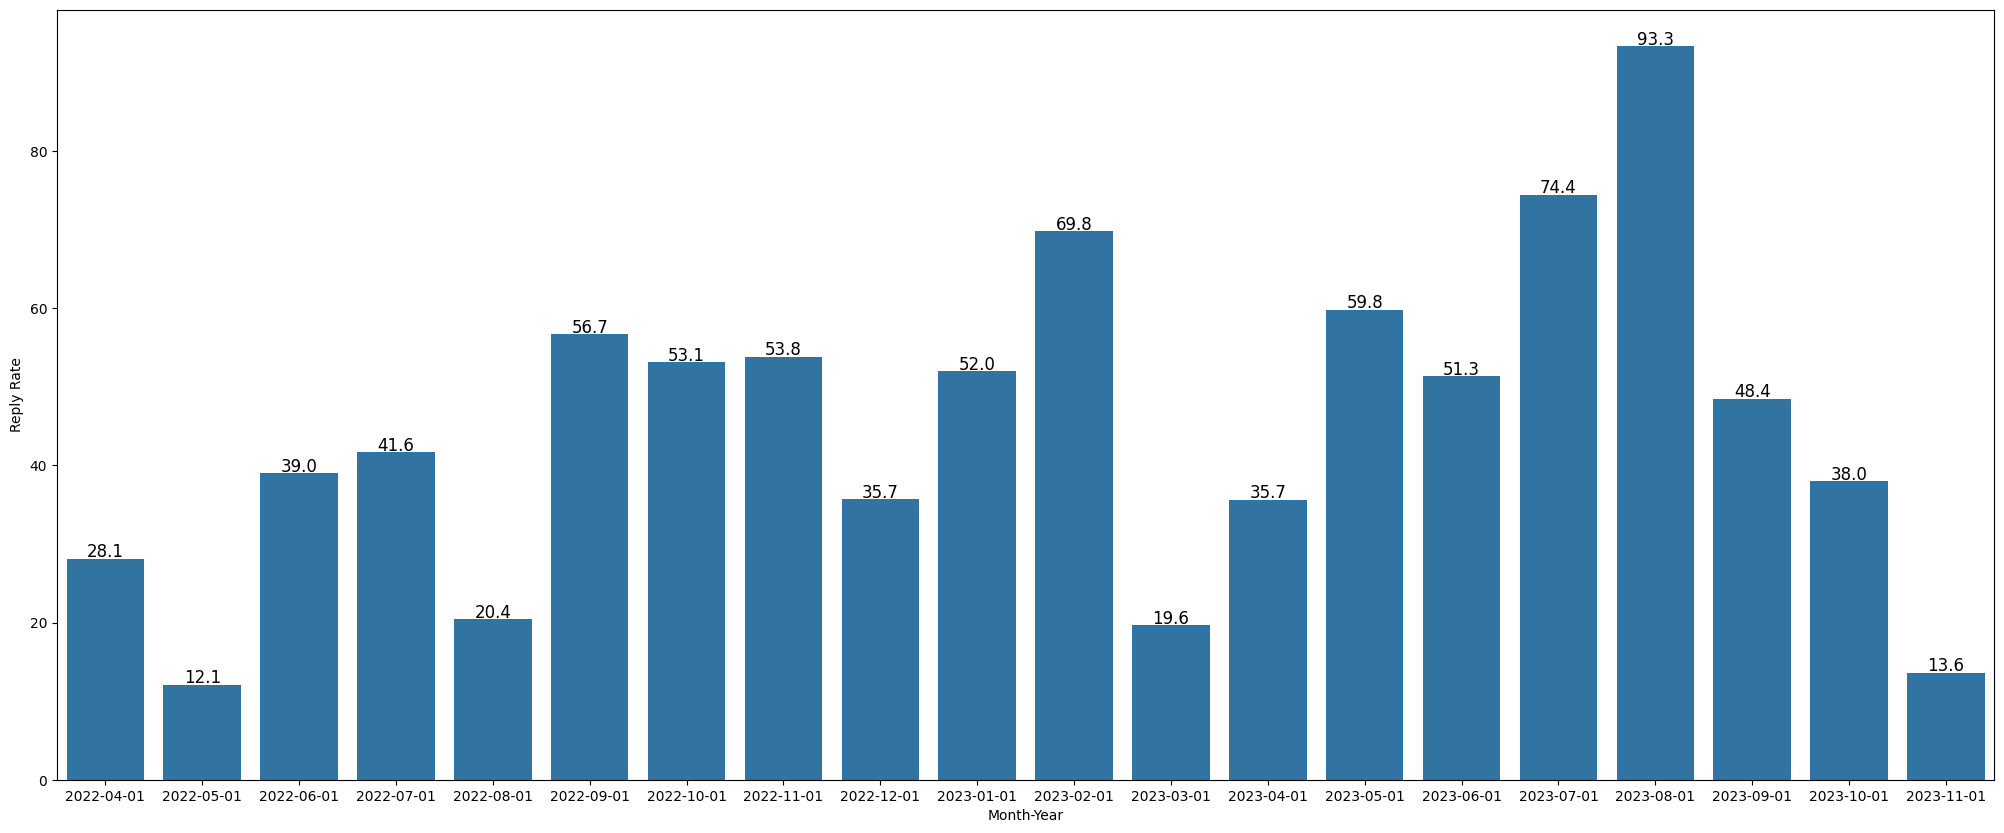

In [201]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate_for_low_ratings, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [202]:
df_high_ratings = df[df["stars"]>3]
reply_rate_for_high_ratings = df_high_ratings.groupby('Month-Year')['CompanyReply'].apply(lambda x: (1-(x.isna().sum() / len(x))) * 100).reset_index(name='Reply Rate')

print(reply_rate_for_high_ratings)

   Month-Year  Reply Rate
0  2022-04-01    0.037994
1  2022-05-01    0.110335
2  2022-06-01    0.069565
3  2022-07-01    0.000000
4  2022-08-01    0.036536
5  2022-09-01    0.000000
6  2022-10-01    0.138985
7  2022-11-01    0.228659
8  2022-12-01    0.160321
9  2023-01-01    0.000000
10 2023-02-01    0.600601
11 2023-03-01    0.124844
12 2023-04-01    4.939627
13 2023-05-01    4.106280
14 2023-06-01    8.971963
15 2023-07-01    8.891753
16 2023-08-01    8.412698
17 2023-09-01    9.765625
18 2023-10-01    9.818731
19 2023-11-01    2.654867


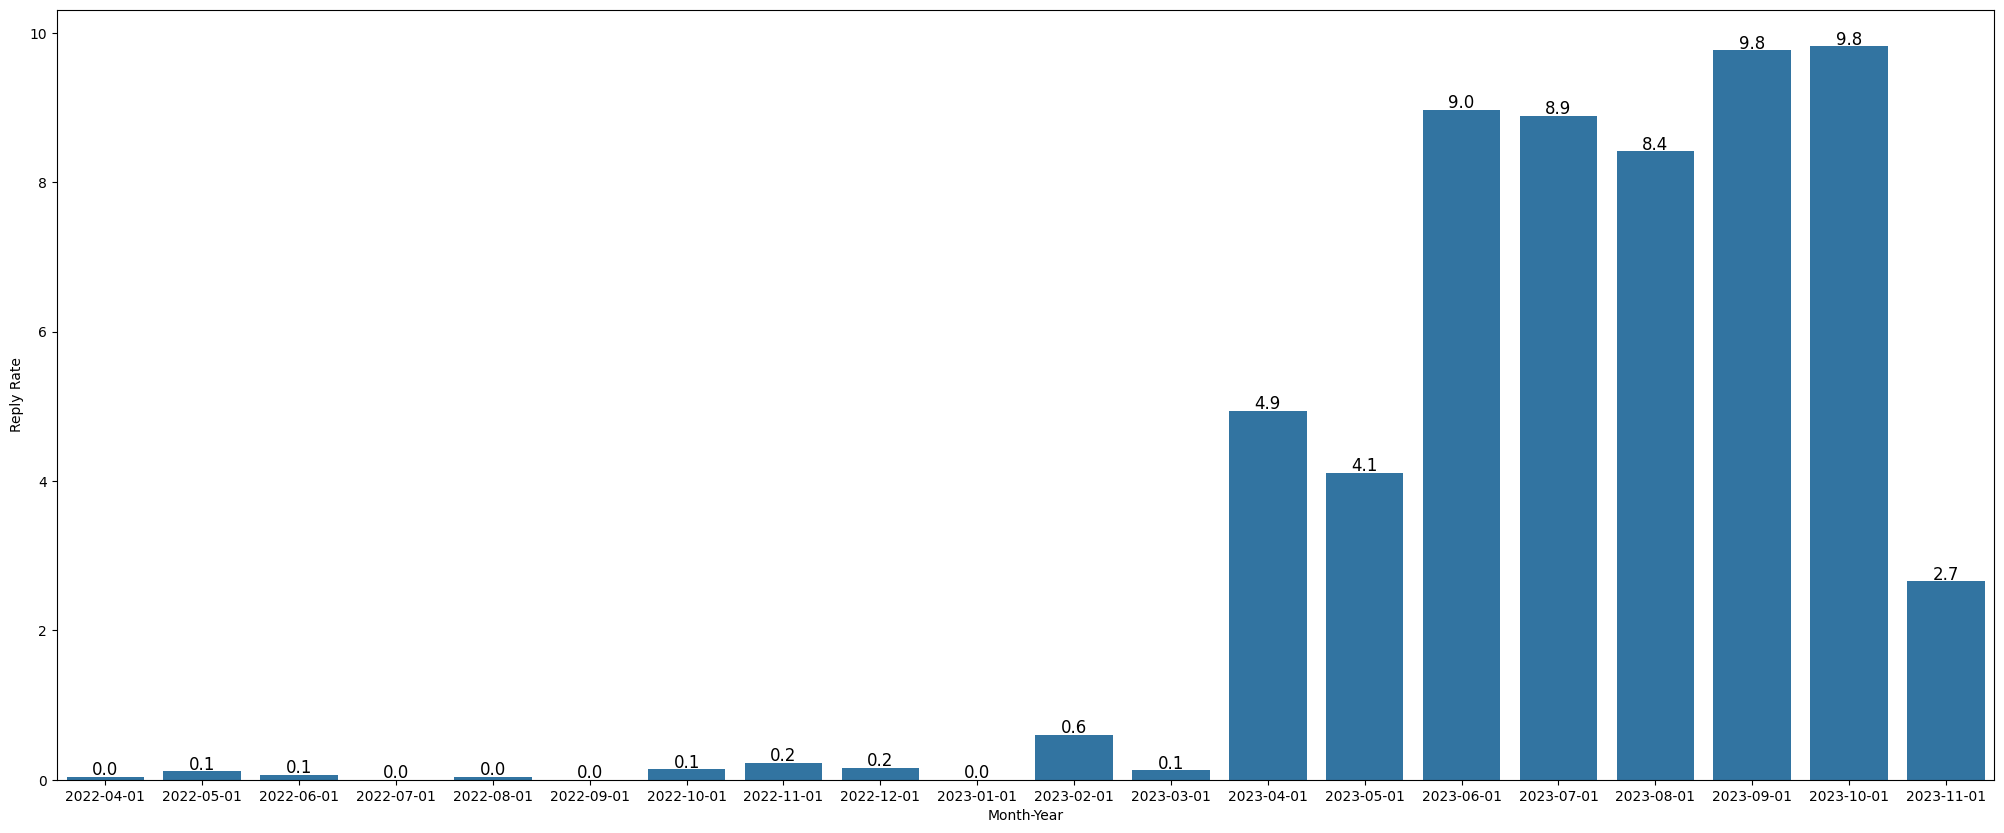

In [203]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=reply_rate_for_high_ratings, x="Month-Year", y="Reply Rate")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [204]:
df.head(2)

,platform,id,stars,title,message,review_date,review_time,CompanyReply,CompanyReplyDate,CompanyReplyTime,review_datetime,company_reply_datetime,time_taken_to_reply,Month-Year
20,Wise,6280b7c6f03a9893e98def64,4,"Usually very efficient,",Useful,2022-05-15,10:20:22,None,None,None,2022-05-15 10:20:22,NaT,-999,2022-05-01
21,Wise,6280ad07166eb7ecbf474180,5,Wise is simple to use,"Wise is simple to use, v fast & gets it right ...",2022-05-15,09:34:31,None,None,None,2022-05-15 09:34:31,NaT,-999,2022-05-01


In [217]:
replied = df[(~df["company_reply_datetime"].isna()) & (df["time_taken_to_reply"]>=0)]

In [218]:
replies_over_time = replied.groupby('Month-Year').agg({'time_taken_to_reply': 'mean'}).reset_index()
replies_over_time['time_taken_to_reply'] = ratings_over_time['stars'].round(1)

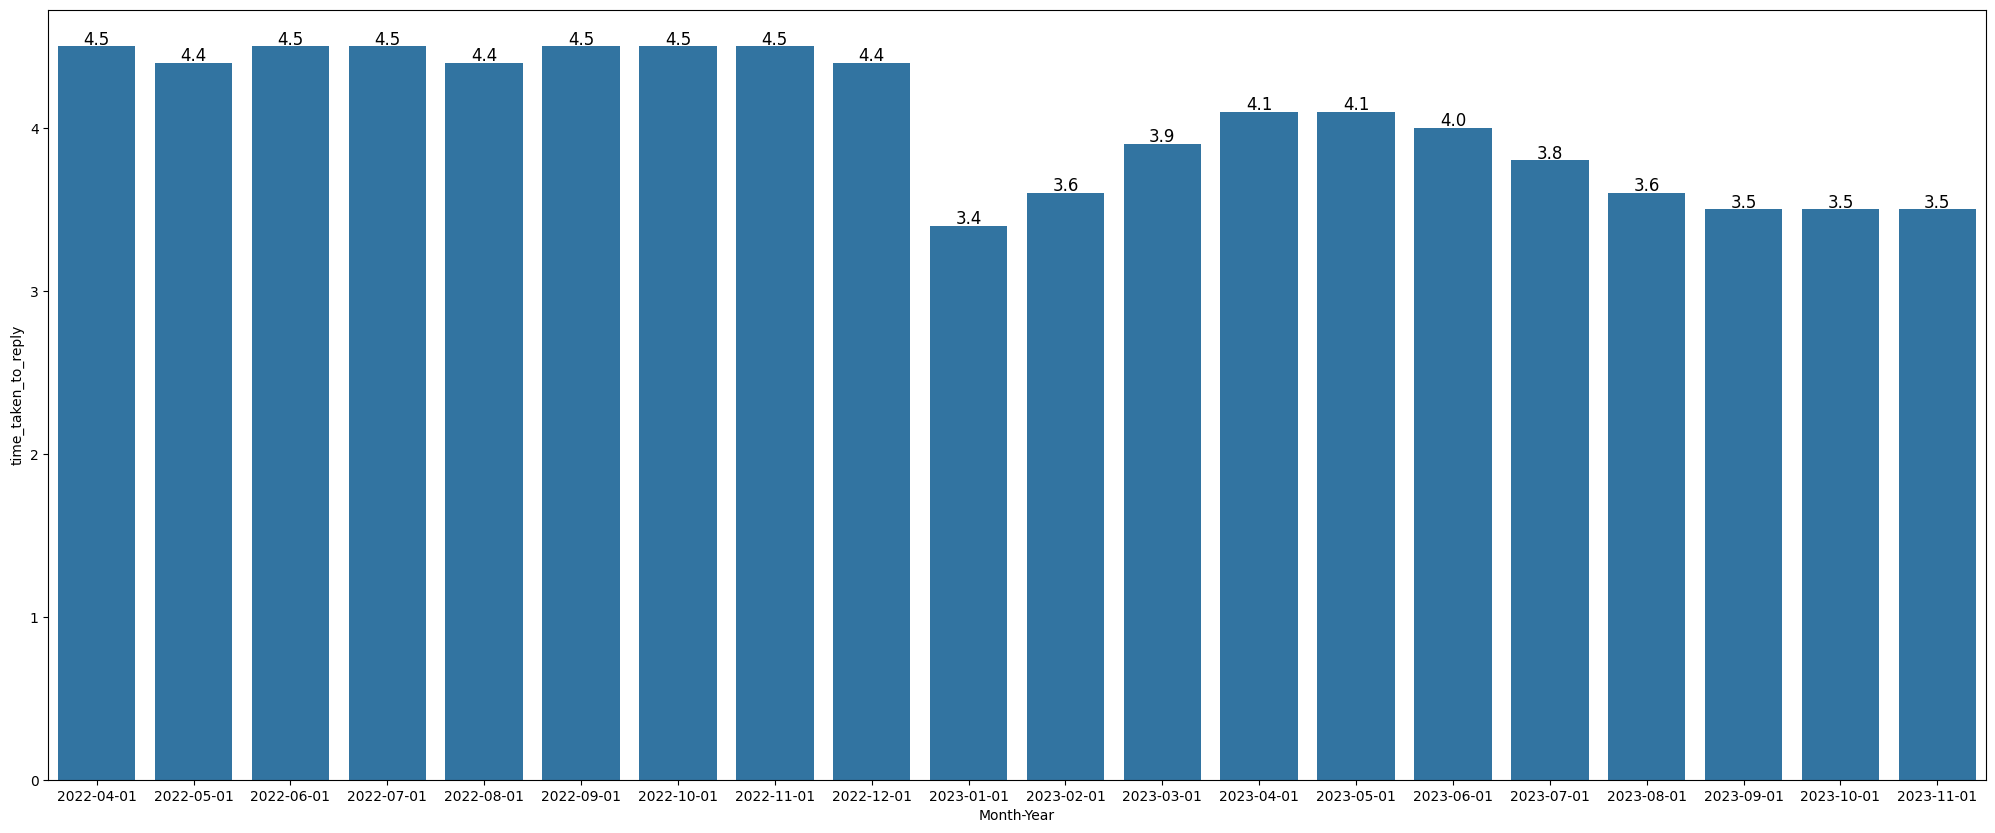

In [219]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=replies_over_time, x="Month-Year", y="time_taken_to_reply")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [221]:
replied_low_ratings = replied[replied["stars"]<3]

In [222]:
replied_low_ratings[replied_low_ratings['review_datetime']>=one_year_ago].time_taken_to_reply.mean()

3.314383172256964

In [223]:

replies_over_time_low_ratings = replied_low_ratings.groupby('Month-Year').agg({'time_taken_to_reply': 'mean'}).reset_index()
replies_over_time_low_ratings['time_taken_to_reply'] = replies_over_time_low_ratings['time_taken_to_reply'].round(1)

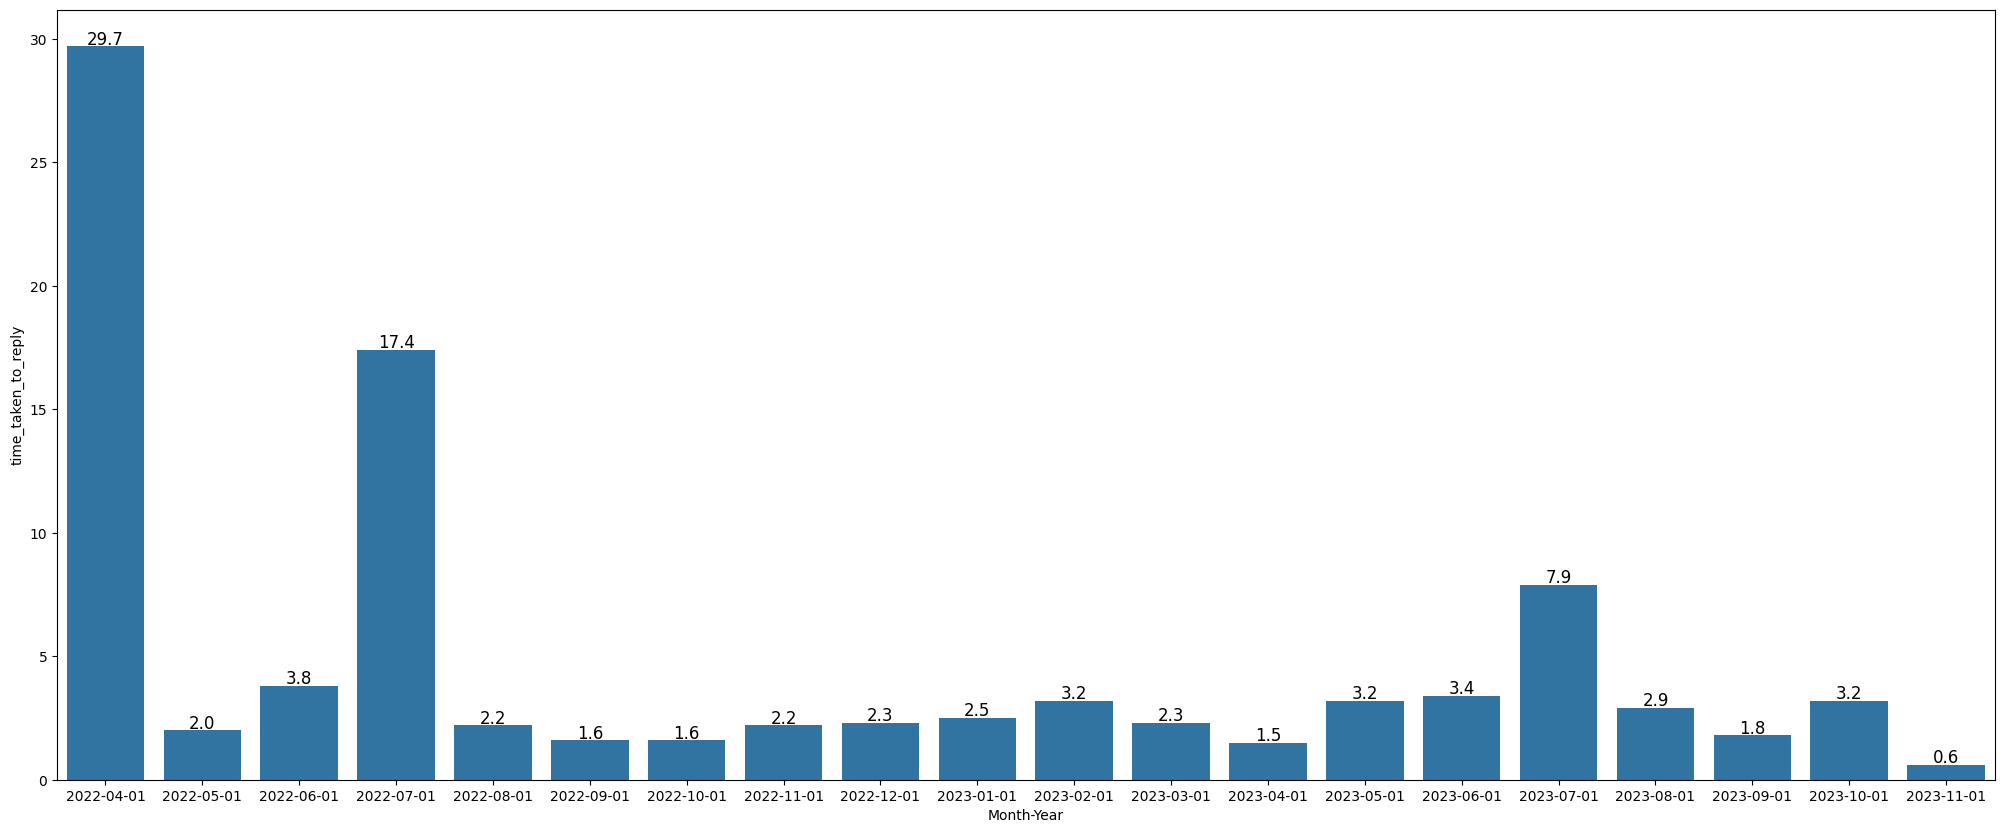

In [225]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=replies_over_time_low_ratings, x="Month-Year", y="time_taken_to_reply")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


In [226]:
replies_over_time_low_ratings

,Month-Year,time_taken_to_reply
0,2022-04-01,29.7
1,2022-05-01,2.0
2,2022-06-01,3.8
3,2022-07-01,17.4
4,2022-08-01,2.2
5,2022-09-01,1.6
6,2022-10-01,1.6
7,2022-11-01,2.2
8,2022-12-01,2.3
9,2023-01-01,2.5


In [227]:
replied_high_ratings = replied[replied["stars"]>3]
replied_high_ratings[replied_high_ratings['review_datetime']>=one_year_ago].time_taken_to_reply.mean()

19.317535545023695

In [228]:

replies_over_time_high_ratings = replied_high_ratings.groupby('Month-Year').agg({'time_taken_to_reply': 'mean'}).reset_index()
replies_over_time_high_ratings['time_taken_to_reply'] = replies_over_time_high_ratings['time_taken_to_reply'].round(1)

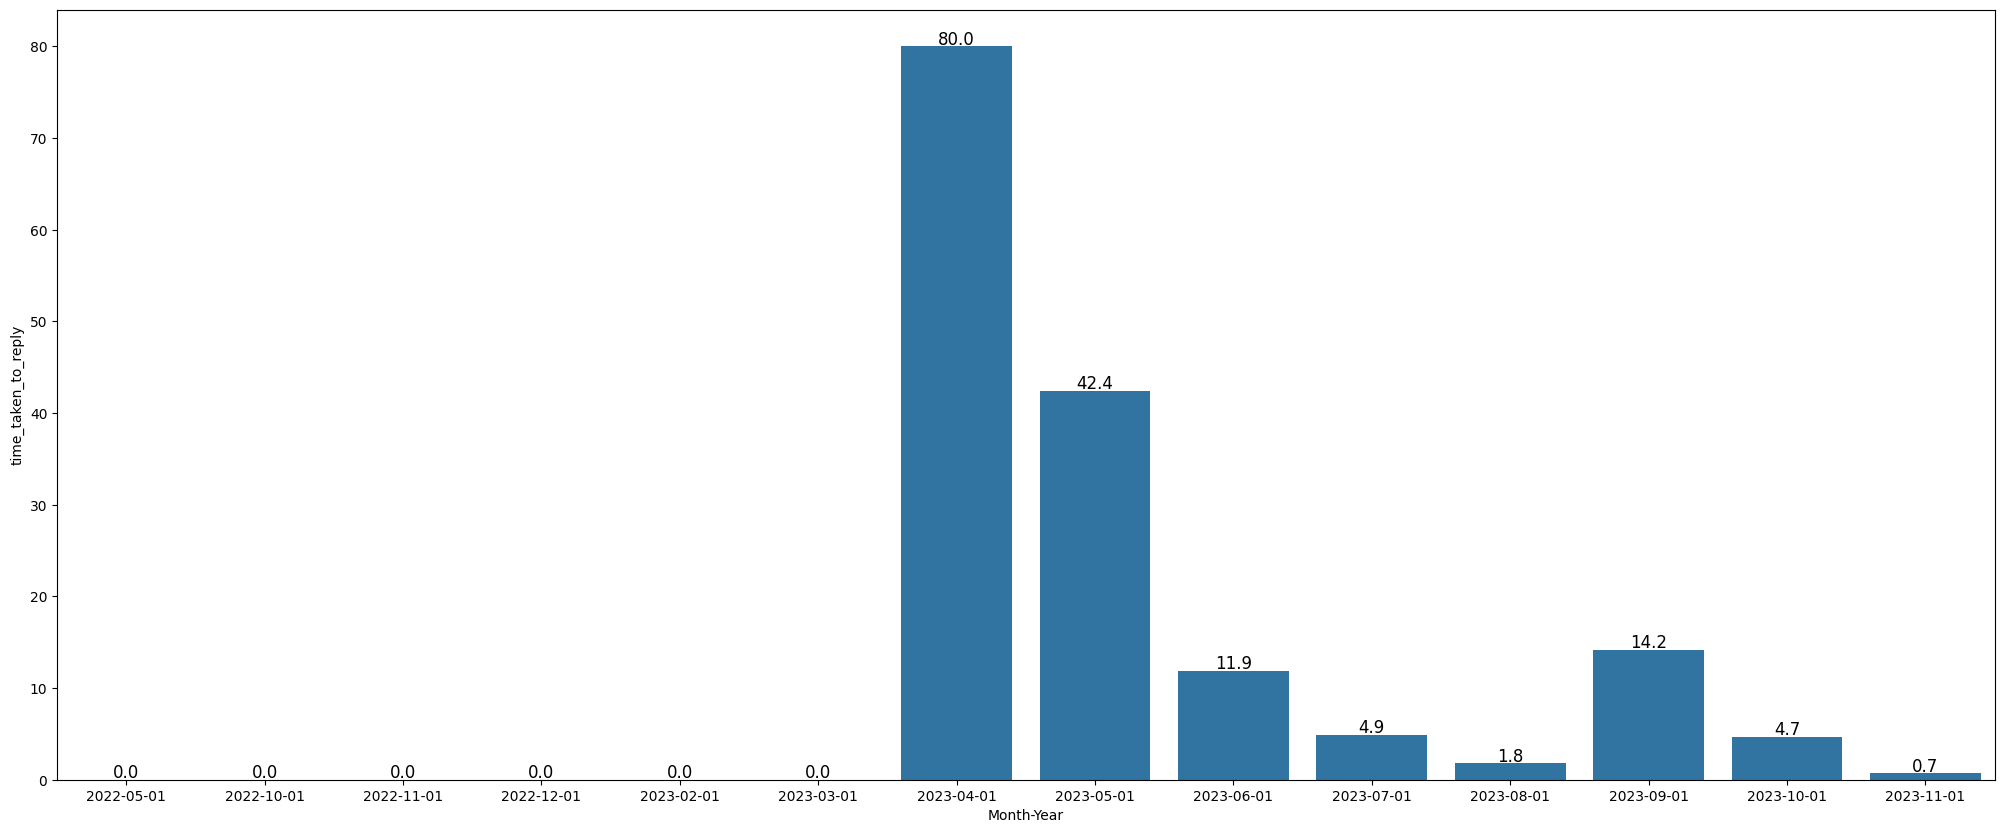

In [229]:
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=replies_over_time_high_ratings, x="Month-Year", y="time_taken_to_reply")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
